<a href="https://colab.research.google.com/github/tetrukavi/machine_learning_bgu/blob/main/ML_ex1_Unsupervised_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ex1 - Unsupervised learning**

## Names and IDs

1.   List item
2.   List item

## URL for the Colab notebook:


**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Use Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%pip install category_encoders
import category_encoders as ce
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA




## Prepare Kaggle Load
Navigate to https://www.kaggle.com. Then go to the Account tab of your user profile and under settings find "API" and then click **Create New Token**. This will trigger the download of kaggle.json, a file containing your API credentials.
Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

* If you don't use Colab, save the files locally using relative paths.


In [92]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


After uploading the kaggle.json select the data to upload (costumers segmentation in this example). The dataset will be copy to the enviroment in the '/content' directory. You will see the 'Retail.xlsx'.
For more about the dataset you can read [here](https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset/data).

In [93]:
# download the dataset
!kaggle datasets download -d yasserh/customer-segmentation-dataset

# extract the files
!unzip '/content/customer-segmentation-dataset.zip'

Dataset URL: https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset
License(s): CC0-1.0
 41% 9.00M/21.8M [00:00<00:00, 78.8MB/s]
100% 21.8M/21.8M [00:00<00:00, 126MB/s] 
Archive:  /content/customer-segmentation-dataset.zip
  inflating: Online Retail.xlsx      


In [1]:
from google.colab import files
uploaded = files.upload()


Saving customer_segmentation.csv to customer_segmentation.csv


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

## 1. Visualization (9 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

Excel file can be loaded using pandas like this:
`df = pd.read_excel('/content/Online Retail.xlsx')`

*   You will get 2 points for the graph and 1 for the insight.

In [73]:
# load the data
df = pd.read_csv('customer_segmentation.csv')
print(df.head())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

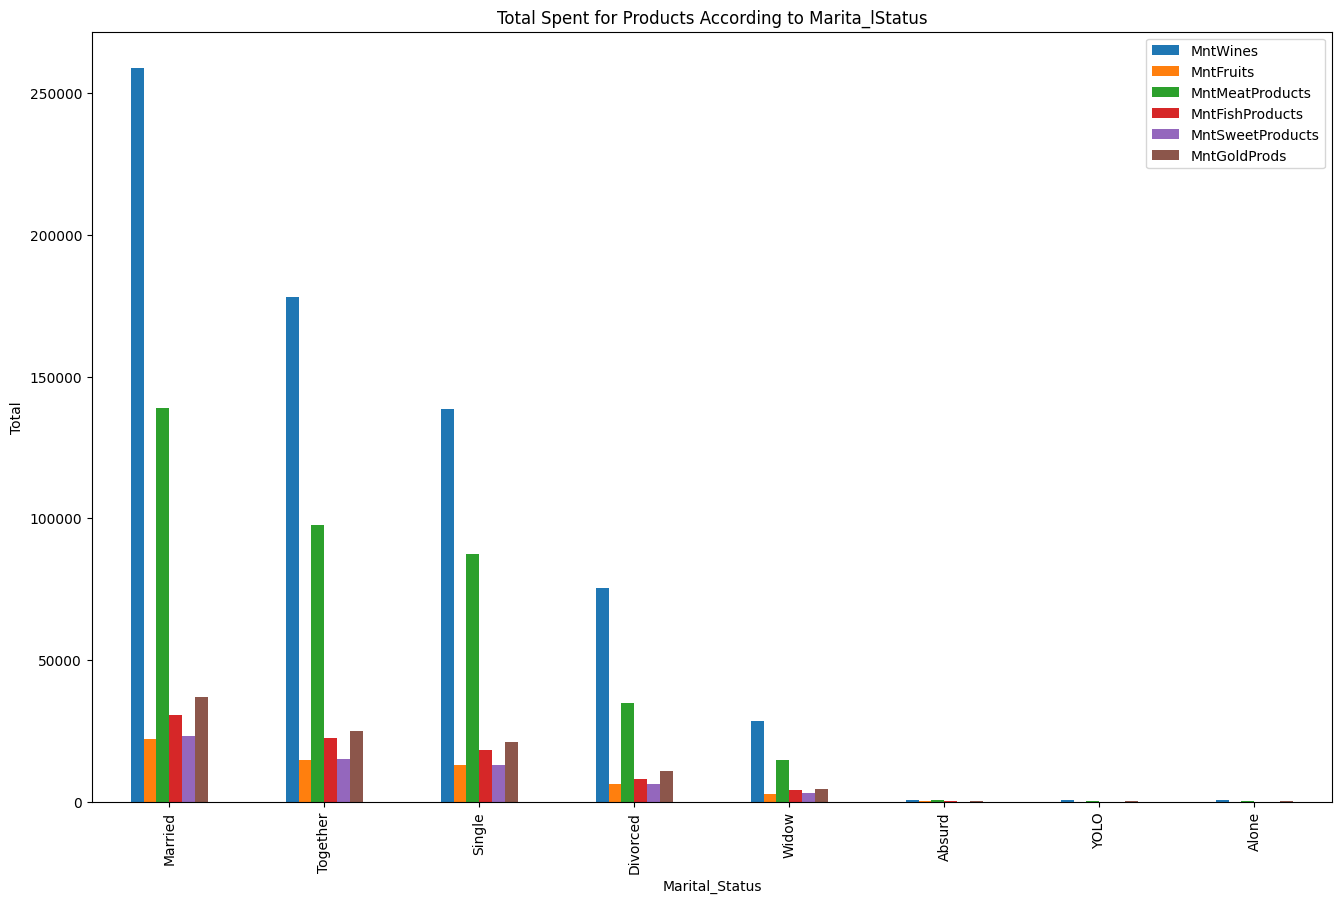

Percentage of total spending on wine: 50.17%
Percentage of total spending on meat products: 27.56%


In [66]:
# Graph 1 -


total_spent_graph = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 'Marital_Status']].groupby(["Marital_Status"]).sum().reset_index().sort_values(by=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], ascending=False)
total_spent_graph.plot(x="Marital_Status", ylabel= "Total", kind="bar", figsize=(16, 10), legend=True, title="Total Spent for Products According to Marita_lStatus")
plt.show()

total_spent = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sum()
total_meat_spent = df['MntMeatProducts'].sum()
total_wine_spent = df['MntWines'].sum()

meat_percentage = (total_meat_spent / total_spent) * 100
wine_percentage = (total_wine_spent / total_spent) * 100

print(f"Percentage of total spending on wine: {wine_percentage:.2f}%")
print(f"Percentage of total spending on meat products: {meat_percentage:.2f}%")



**Insight** -

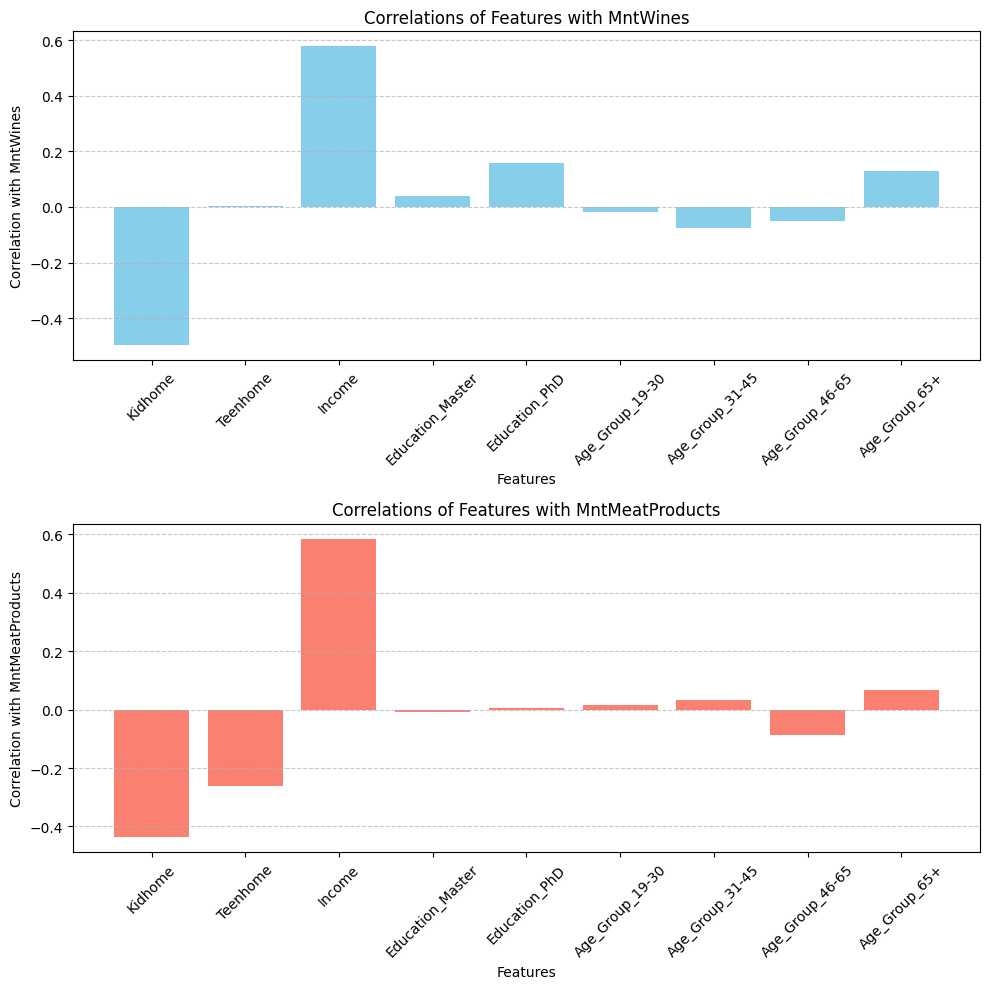

In [103]:


df = pd.read_csv('customer_segmentation.csv')


current_year = 2024
df['Age'] = current_year - df['Year_Birth']

# Convert the categorical 'Education' column to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Education'], drop_first=True)


# Define age bins and labels
age_bins = [0, 18, 30, 45, 65, float('inf')]
age_labels = ['0-18', '19-30', '31-45', '46-65', '65+']

# Convert Age column to categorical age groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


# Drop the original 'Age' column if no longer needed
df.drop(columns=['Age'], inplace=True)

df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)



# Calculate the correlations with MntWines
corr_wines = df[['Kidhome', 'Teenhome', 'Income', 'Education_Master', 'Education_PhD', 'Age_Group_19-30','Age_Group_31-45','Age_Group_46-65','Age_Group_65+', 'MntWines']].corr()['MntWines']

# Calculate the correlations with MntMeatProducts
corr_meat = df[['Kidhome', 'Teenhome', 'Income', 'Education_Master', 'Education_PhD', 'Age_Group_19-30','Age_Group_31-45','Age_Group_46-65','Age_Group_65+', 'MntMeatProducts']].corr()['MntMeatProducts']

# Define features and their correlations
features_wines = ['Kidhome', 'Teenhome', 'Income', 'Education_Master', 'Education_PhD', 'Age_Group_19-30', 'Age_Group_31-45', 'Age_Group_46-65', 'Age_Group_65+']
correlations_wines = corr_wines[:-1]  # Exclude the target variable "MntWines"

features_meat = ['Kidhome', 'Teenhome', 'Income', 'Education_Master', 'Education_PhD', 'Age_Group_19-30', 'Age_Group_31-45', 'Age_Group_46-65', 'Age_Group_65+']
correlations_meat = corr_meat[:-1]  # Exclude the target variable "MntMeatProducts"

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot correlations with MntWines
ax1.bar(features_wines, correlations_wines, color='skyblue')
ax1.set_xlabel('Features')
ax1.set_ylabel('Correlation with MntWines')
ax1.set_title('Correlations of Features with MntWines')
ax1.set_xticks(features_wines)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot correlations with MntMeatProducts
ax2.bar(features_meat, correlations_meat, color='salmon')
ax2.set_xlabel('Features')
ax2.set_ylabel('Correlation with MntMeatProducts')
ax2.set_title('Correlations of Features with MntMeatProducts')
ax2.set_xticks(features_meat)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()


**Insight** -

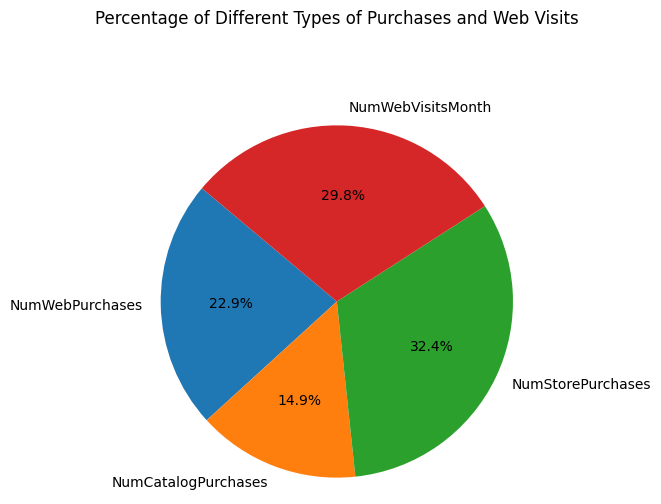

In [104]:
# Graph 3 -

total_counts = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum()

# Plotting
plt.figure(figsize=(5, 5))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140,labeldistance=1.1)
plt.title('Percentage of Different Types of Purchases and Web Visits',y=1.2)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



**Insight** -

## 2. KMEANS (20 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (1 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (4 points).
*   Visualize the clusters (3 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (5 points).
*   Visualize the methods (4 points).










In [216]:
# load the data
df = pd.read_csv('customer_segmentation.csv')


In [217]:
# Scale the data using MinMaxScaler
df = df.drop(columns=['ID'])
df = df.drop(columns=['Z_CostContact'])
df = df.drop(columns=['Z_Revenue'])



numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
df_scaled = df.copy()  # Create a copy of the DataFrame to avoid modifying the original data
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])
#print(df_scaled)


# Encode categorical variables
print(df['Education'].unique())

education_order = ['Basic', 'Graduation', '2n Cycle','Master','PhD']

# Initialize the OrdinalEncoder with specified order
ordinal_encoder = ce.OrdinalEncoder(mapping=[{'col': 'Education', 'mapping': {level: index for index, level in enumerate(education_order)}}])

# Fit and transform the DataFrame
df_encoded = ordinal_encoder.fit_transform(df_scaled)

df_encoded = pd.get_dummies(df_encoded, columns=['Marital_Status'])



df_encoded['Dt_Customer'] = pd.to_datetime(df_encoded['Dt_Customer'], format='%d-%m-%Y')
#Extract the month and year from the date column:


df_encoded['Month'] = df_encoded['Dt_Customer'].dt.month
df_encoded['Year'] = df_encoded['Dt_Customer'].dt.year


df_encoded.drop(columns=['Dt_Customer'], inplace=True)

df_encoded[['Year', 'Month']] = scaler.fit_transform(df_encoded[['Month','Year']])
df_encoded[['Education']] = scaler.fit_transform(df_encoded[['Education']])



# Display the DataFrame with ordinal encoding
print(df_encoded)

#df_encoded = pd.get_dummies(df_scaled)

# print(df_encoded.head())



['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
      Year_Birth  Education    Income  Kidhome  Teenhome   Recency  MntWines  \
0       0.621359       0.25  0.084832      0.0       0.0  0.585859  0.425318   
1       0.592233       0.25  0.067095      0.5       0.5  0.383838  0.007368   
2       0.699029       0.25  0.105097      0.0       0.0  0.262626  0.285332   
3       0.883495       0.25  0.037471      0.5       0.0  0.262626  0.007368   
4       0.854369       1.00  0.085065      0.5       0.0  0.949495  0.115874   
...          ...        ...       ...      ...       ...       ...       ...   
2235    0.718447       0.25  0.089472      0.0       0.5  0.464646  0.474883   
2236    0.514563       1.00  0.093669      1.0       0.5  0.565657  0.271936   
2237    0.854369       0.25  0.083092      0.0       0.0  0.919192  0.608171   
2238    0.611650       0.75  0.101536      0.0       0.5  0.080808  0.286671   
2239    0.592233       1.00  0.076908      0.5       0.5  0.404040  0.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


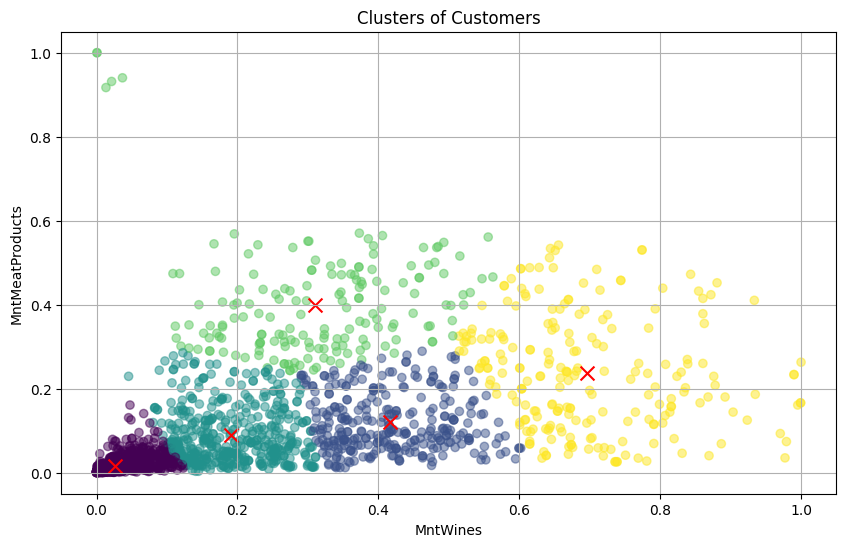

In [218]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5
features = df_encoded[['MntWines', 'MntMeatProducts']]

# Apply k-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features['MntWines'], features['MntMeatProducts'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)  # Plot cluster centers
plt.xlabel('MntWines')
plt.ylabel('MntMeatProducts')
plt.title('Clusters of Customers')
plt.grid(True)
plt.show()



### Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

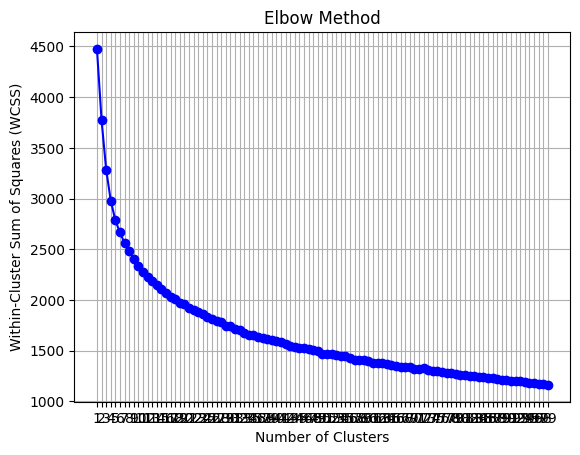

In [221]:
wcss = []

df_encoded = df_encoded.dropna()


# Determine the optimal number of clusters using the Elbow method
for i in range(1, 100):  # Try different numbers of clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list

# Plot the Elbow curve
plt.plot(range(1, 100), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 100))
plt.grid(True)
plt.show()

### Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

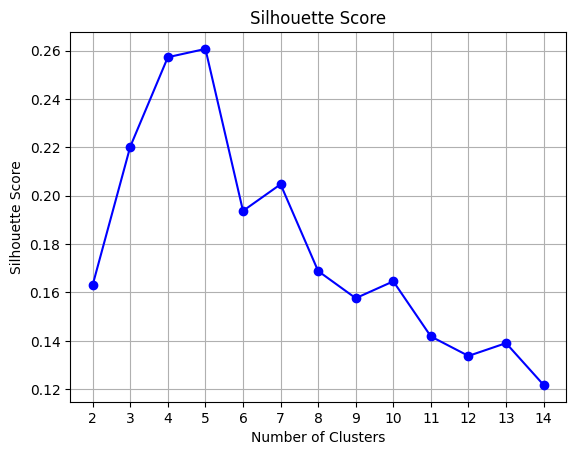

In [223]:
silhouette_scores = []
# Determine the Silhouette Score for different numbers of clusters
for i in range(2, 15):  # Try different numbers of clusters from 2 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(df_encoded)
    silhouette_avg = silhouette_score(df_encoded, cluster_labels)
    silhouette_scores.append(silhouette_avg)  # Append the Silhouette Score to the list

# Plot the Silhouette Scores
plt.plot(range(2, 15), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 15))
plt.grid(True)
plt.show()


## 3. PCA (8 points)
In this exercise, you will use PCA:
*   With n_components = 2 (3 points).
*   Visualize the PCA (2 points).
*   Find the variance explined in this PCA (3 points).





      Year_Birth  Education    Income  Kidhome  Teenhome   Recency  MntWines  \
0       0.621359       0.25  0.084832      0.0       0.0  0.585859  0.425318   
1       0.592233       0.25  0.067095      0.5       0.5  0.383838  0.007368   
2       0.699029       0.25  0.105097      0.0       0.0  0.262626  0.285332   
3       0.883495       0.25  0.037471      0.5       0.0  0.262626  0.007368   
4       0.854369       1.00  0.085065      0.5       0.0  0.949495  0.115874   
...          ...        ...       ...      ...       ...       ...       ...   
2235    0.718447       0.25  0.089472      0.0       0.5  0.464646  0.474883   
2236    0.514563       1.00  0.093669      1.0       0.5  0.565657  0.271936   
2237    0.854369       0.25  0.083092      0.0       0.0  0.919192  0.608171   
2238    0.611650       0.75  0.101536      0.0       0.5  0.080808  0.286671   
2239    0.592233       1.00  0.076908      0.5       0.5  0.404040  0.056263   

      MntFruits  MntMeatProducts  MntFi

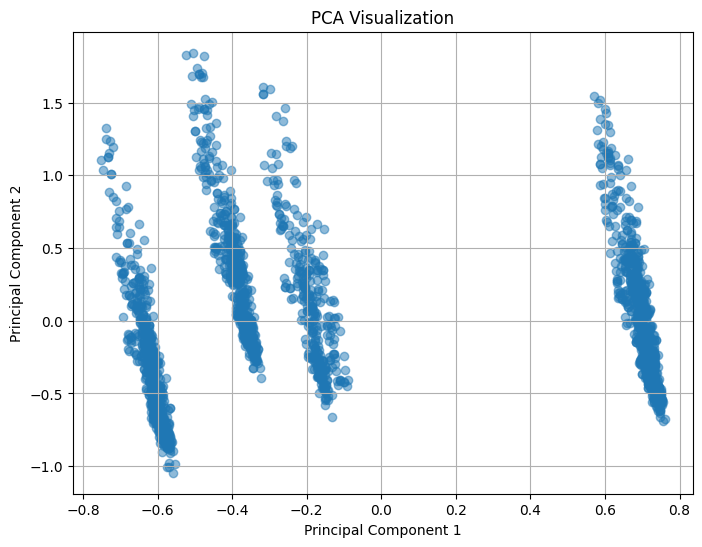

Variance explained by PC1: 0.16173784153200602
Variance explained by PC2: 0.12618605764833124


In [224]:
# Adjust n_components as needed
pca = PCA(n_components=2)
print(df_encoded)


# Create a DataFrame with the principal components
pca_features = pca.fit_transform(df_encoded)



# Plotting the PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Display explained variance






# Find the variance explained by the two principal components
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance explained by PC1:", explained_variance_ratio[0])
print("Variance explained by PC2:", explained_variance_ratio[1])


**Q**: What is the variance explained in the 2 component PCA?

**A**:

## 4. PCA & Kmeans (11 points)
This time, we will use the PCA computed output for the kmeans model.
*   Run PCA with n_components = 2 (1 points)
*   Find the best k for kmeans (4 points)
*   Plot the best clusters (3 points)
*   Answer the question (What question?) (3 points)





### Elbow

### Silhouette

**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:



## 6. Find 3 datasets online (from kaggle, UCI, etc.) with more than 10 features and include labels - add links to datasets. (37 points)

a. Use PCA and TSNE (two different methods) with 2 components each and show the data with their labels (for each of the 3 data sets). 10 points

b. Use 3 different clustering methods for each dataset and show plots. Explain which had best results when comparing to labels and why. 12 points

c. Explain some of the differences between PCA and TSNE, while addressing the addition of data to the dataset in each. 8 points

d. Run datasets with LDA and show plot, how did this method effect results and why? 7 points


## 7. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}